# Statistical Measurements and Visualizations

In this recitation, we are going to discuss and compare some of the statistical measurements from a practical point of view. To this end, we are going to utilize multiple datasets, in addition to synthetic distributions.

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

%matplotlib inline

## Descriptive vs Inferential Statistics

![](https://s3.amazonaws.com/libapps/accounts/73970/images/descriptive_and_inferential.JPG)

## Data Levels of Measurement

> A variable has one of four different levels of measurement.

![](https://lh5.googleusercontent.com/7jyxzQ2ObysJGLFcGB6Zc25AHAswexk68SbOh_KYa4if2P9yRe7lIC8NDUgZEcSGspqpRIGQcMx_qCmrG6sjHegFHy9Sqhp_1z3PFido6d19TKYFq0pMTHDs4OV9l6pP-MTNmeKu)



## Measures of Central Tendency

> A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data.


### Mean

Possibly the most popular and well known measure of central tendency.

$\hat{x} = (x_1 + x_2 + ... + x_n) \, / \, n$

$\mu = \frac{\Large \Sigma x_i}{\Large n}$

In [ ]:
# a random data in which
# observations are from [0,1)
data = list(np.random.rand(10))

# a function to calculate the mean
def fmean(data):
  s = 0
  for observation in data:
    s += observation
  return s/len(data)

mean = fmean(data)
mean

0.4328187094853003

Let's visualize the situation here.

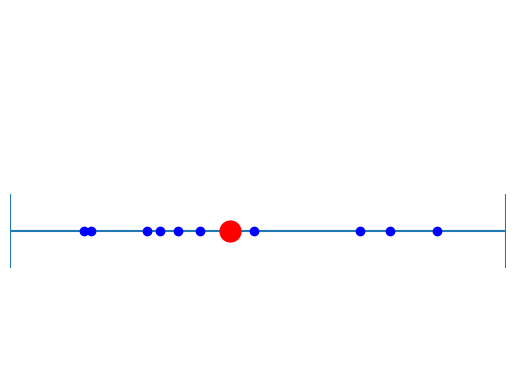

In [ ]:
def plot_mean(data, xmin=0, xmax=1, offset=0.1):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_xlim(xmin-offset, xmax+offset)
  ax.set_ylim(0, 5)

  # draw lines
  y = 2
  height = 1
  plt.hlines(y, xmin - offset, xmax + offset)
  plt.vlines(xmin - offset, y - height / 2., y + height / 2.)
  plt.vlines(xmax + offset, y - height / 2., y + height / 2.)

  # plot the data
  for observation in data:
    plt.plot(observation, y, "bo")

  # calculate the mean
  mean = fmean(data)

  # plot the mean
  plt.plot(mean, y, "ro", ms = 15)

  plt.axis("off")
  plt.show()

plot_mean(data)

Now, let's insert a relatively big value to the data and observe how the things change.

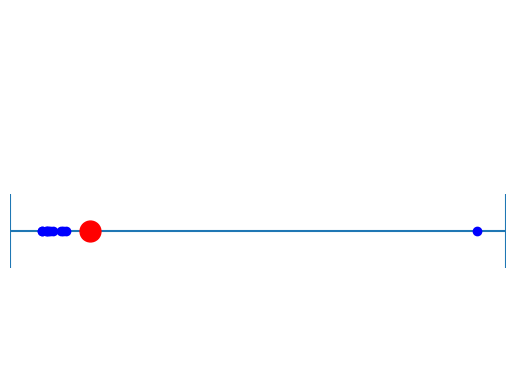

In [ ]:
new_observation = 15
# to work on a copy
d = data.copy()
d.append(new_observation)

plot_mean(d, xmax=new_observation, offset=1)

#### Outliers

The new observation that we have just appended is quite distinct compared to the overall observations in the data.  
In technical terms, it is an **outlier**.

> An outlier is an observation that lies outside the overall pattern of a distribution.

![](https://cdn.shortpixel.ai/client/q_glossy,ret_img,w_1667,h_1042/http://141.89.112.21/wp-content/uploads/2017/02/corrcoefs_1.png)

Although, mean is a very handy metric, it has a big disadvantage.
It is highly susceptible to the influence of outliers.

#### Skewed Distributions

> The mean loses its representativeness for the the best central location of the data because the skewed data is dragging it away from the typical value.

![](https://schoolbag.info/physics/physics_math/physics_math.files/image790.jpg)



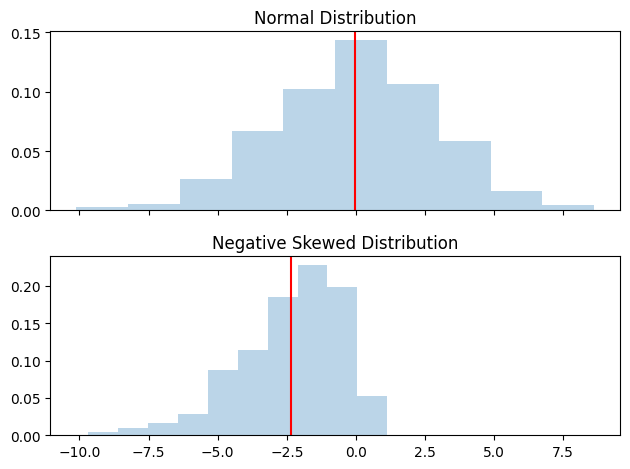

In [ ]:
from scipy.stats import skewnorm, norm

# number of instances
n = 1000
# mean
m = 0
# std
s = 3

# normal dist
r_norm = norm.rvs(loc=m, scale=s, size=n)
# skewed dist
skewness = -5 # skewness
r_skew = skewnorm.rvs(skewness, loc=m, scale=s, size=n)

fig, axes = plt.subplots(2,1, sharex=True)
# plot the normal and its mean
axes[0].set_title("Normal Distribution")
axes[0].hist(r_norm, alpha=0.3, density=True)
axes[0].axvline(r_norm.mean(), 0, 1, c="r")

# plot the skewed and it mean
axes[1].set_title("Negative Skewed Distribution")
axes[1].hist(r_skew, alpha=0.3, density=True)
axes[1].axvline(r_skew.mean(), 0, 1, c="r")

plt.tight_layout()
plt.show()

In case of outliers or skewed distribution, mean becomes a misleading measurement.

### Median

> The median is the `middle` value in a **sorted** list of numbers.

In [ ]:
def fmedian(d):
  l = len(d)
  v = np.sort(d)
  return (v[int((l-0.5)/2)] + v[int((l+0.5)/2)]) / 2

data = np.random.rand(10)
median = fmedian(data)
median

0.6217676596995044

Now, let's use the same setting above and observe how median behaves with skewed data.

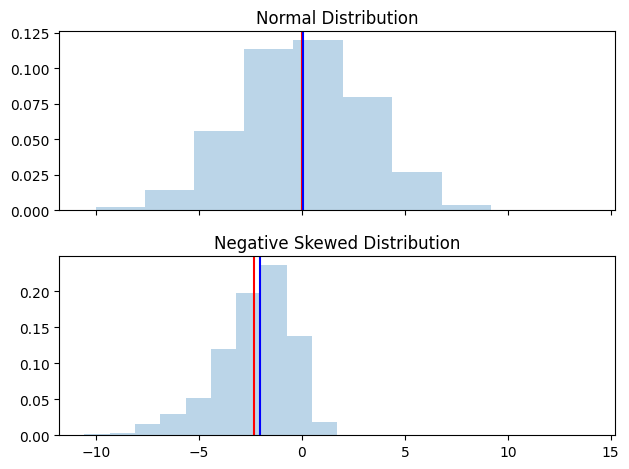

In [ ]:
from scipy.stats import skewnorm, norm

# number of instances
n = 1000
# mean
m = 0
# std
s = 3

# normal dist
r_norm = norm.rvs(loc=m, scale=s, size=n)
# skewed dist
skewness = -5 # skewness
r_skew = skewnorm.rvs(skewness, loc=m, scale=s, size=n)

fig, axes = plt.subplots(2,1, sharex=True)
# plot the normal and its mean
axes[0].set_title("Normal Distribution")
axes[0].hist(r_norm, alpha=0.3, density=True)
axes[0].axvline(r_norm.mean(), 0, 1, c="r")
axes[0].axvline(np.median(r_norm), 0, 1, c="b") # median

# plot the skewed and it mean
axes[1].set_title("Negative Skewed Distribution")
axes[1].hist(r_skew, alpha=0.3, density=True)
axes[1].axvline(r_skew.mean(), 0, 1, c="r")
axes[1].axvline(np.median(r_skew), 0, 1, c="b") # median

plt.tight_layout()
plt.show()

### Mode

> The mode is the most frequent value in the data.

In [ ]:
from scipy import stats
from collections import Counter

brands = ["Apple", "Samsung", "Huawei", "Nokia"]
data = np.random.choice(brands, 100, p=[0.5, 0.3, 0.1, 0.1])
counts = Counter(data)
counts

Counter({'Apple': 38, 'Samsung': 43, 'Huawei': 11, 'Nokia': 8})

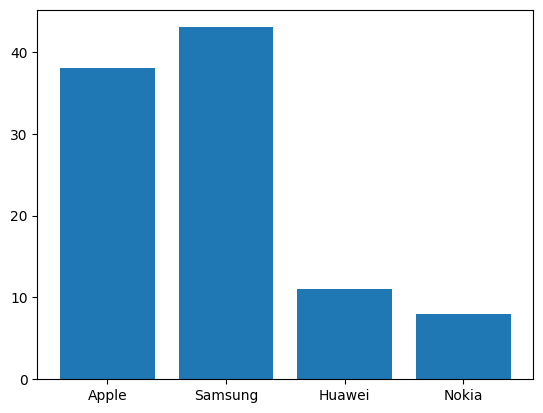

In [ ]:
plt.bar(counts.keys(), counts.values())
plt.show()

## Measures of Spreadness

> Measures of spread describe how similar or varied the set of observed values are for a particular variable.

### Variance & Standard Deviation

> Informally, it measures how far a set of numbers are spread out from their average value.

In [ ]:
def fvar(data):
  mean = data.mean()
  s = 0
  for observation in data:
    s += (observation-mean)**2
  return s/len(data)

def fstd(data):
  var = fvar(data)
  return np.sqrt(var)

data = np.random.rand(10)
variance = fvar(data)
std = fstd(data)
print(f"Std: {std}, Var: {variance}")

Std: 0.2501301397711751, Var: 0.06256508682194759


> Variance and standard deviation are almost the exact same thing! Variance is just the square of the standard deviation. Likewise, variance and standard deviation represent the same thing — a measure of spread — but it’s worth noting that the units are different. Whatever units your data are in, standard deviation will be the same, and variation will be in that units-squared.

## Bivariate Analysis



### Covariance

> The covariance is a measure for how two variables are related to each other, i.e., how two variables vary with each other.

$\Large{cov(X,Y) \; = \; \Sigma_{i=1}^N\frac{(x_i - \hat{x})(y_i - \hat{y})}{N}}$


In [ ]:
def fcov(x,y):
  meanx = x.mean()
  meany = y.mean()
  n = len(x)

  return np.dot((x - meanx), (y - meany)) / (n-1)

x = np.random.rand(10)
y = np.random.rand(10)

cov = fcov(x,y)
cov

-0.010024914956100658

### Correlation

> Measures the linear correlation between two features and is closely related to the covariance. In fact, it’s a normalized version of the covariance. By dividing the covariance by the features’ standard deviations, we ensure that the correlation between two features is in the range [-1, 1], which makes it more interpretable than the unbounded covariance.

$\Large{Corr(X,Y) \; = \; \frac{cov(X,Y)}{\sigma_x \sigma_y}}$

In [ ]:
def fcorr(x,y):
  """
  np.cov returns the covariance matrix of the variables
  the diagonal stores the variances
  """
  c = np.cov(x,y)
  sigmaX = np.sqrt(c[0][0])
  sigmaY = np.sqrt(c[1][1])
  cov = c[0][1]  # or c[1][0]

  return cov/(sigmaX*sigmaY)

x = np.random.rand(10)
y = np.random.rand(10)

corr = fcorr(x,y)
corr

0.383228122455844

## Anscombe's Quartet

Below, we have four different distributions.

- (x, y1)
- (x, y2)
- (x, y3)
- (x4, y4)

Firstly, calculate the mean and standard deviation of *y* variables in each distribution and then compute the pearson coefficient between the variables in each distribution.

In [ ]:
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

pairs = [(x,y1), (x,y2), (x,y3), (x4,y4)]

In [ ]:
# your code

If you computed the values right, the results should be the same for all pairs. So we can conclude that the distributions behave similarly, since they possess identical statistical measurements.

In order to visually show this, let's plot the distributions as scatter plots in a 2x2 grid layout.

In [ ]:
# your code

## Visualization

### Histograms

> A frequency distribution shows how often each different value in a set of data occurs. It is the most commonly used graph to show frequency distributions.

![](https://codingwithmax.com/wp-content/uploads/2019/12/histogram-example-daily-steps-taken-annotated.png)

#### Bin Size

To construct a histogram from a continuous variable you first need to split the data into intervals, called **bins**.

*How are we going to decide on the bin size?*

There is no right or wrong answer as to how wide a bin should be, but there are rules of thumb. You need to make sure that the bins are not too small or too large.

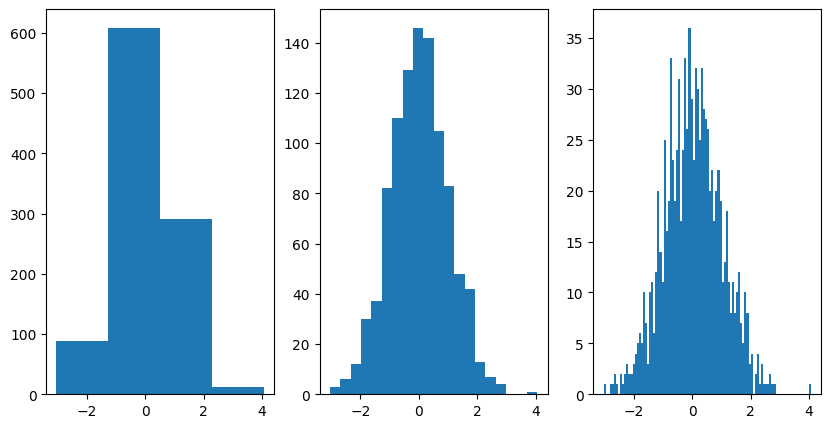

In [ ]:
n = 1000
data = np.random.randn(n)

_, axes = plt.subplots(1,3,figsize=(10,5))
axes[0].hist(data, bins=4)
axes[1].hist(data, bins=20)
axes[2].hist(data, bins=100)

plt.show()

Instead of manual inspection, you may apply bin size estimation methods.

**Scott’s rule** is based on the standard deviation of the data.

You may check this [link](https://docs.astropy.org/en/stable/visualization/histogram.html) for further details.

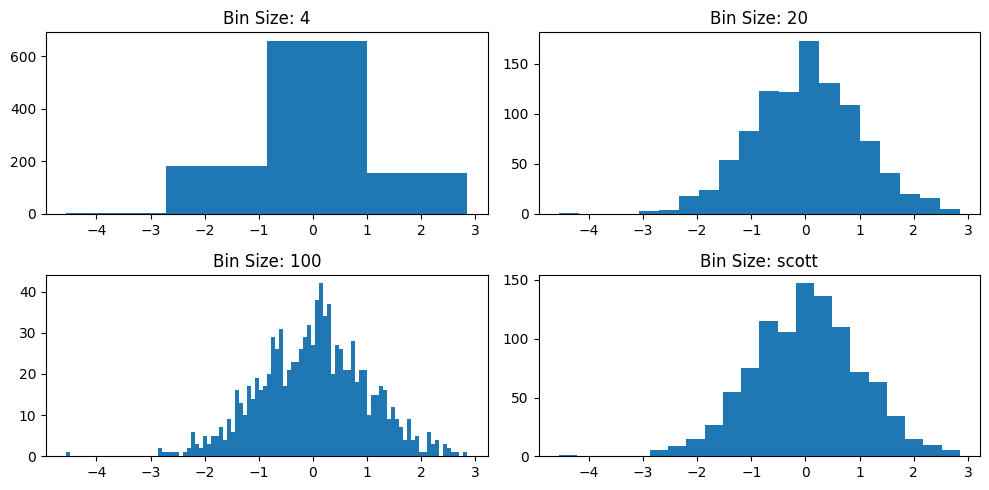

In [ ]:
n = 1000
data = np.random.randn(n)

n_rows = 2
n_cols = 2
bins = [4, 20, 100, "scott"]
_, axes = plt.subplots(n_rows, n_cols, figsize=(10,5))

for i, b in enumerate(bins):
  axes[i//2][i%2].hist(data, bins=b)
  axes[i//2][i%2].set_title(f"Bin Size: {b}")

plt.tight_layout()
plt.show()

And you can always define your own bins.

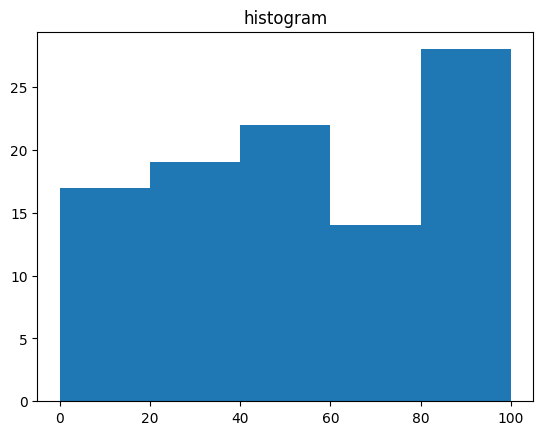

In [ ]:
n = 100
a = np.random.randint(0,100,n)
# plt.hist(a, bins = [0,20,40,60,80,100], rwidth=0.8)
plt.hist(a, bins = [0,20,40,60,80,100])
plt.title("histogram")
plt.show()

### Boxplots

![](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)

#### Quartile & Percentile

**Quartile**:

Quartiles divide a rank-ordered data set into four equal parts. The values that divide each part are called the first, second, and third quartiles; and they are denoted by Q1, Q2, and Q3, respectively.

Note the relationship between quartiles and percentiles. Q1 corresponds to P25, Q2 corresponds to P50, Q3 corresponds to P75. Q2 is the median value in a set of data.

---

**Percentile**:

Assume that the elements in a data set are rank ordered from the smallest to the largest. The values that divide a rank-ordered set of elements into 100 equal parts are called percentiles.

An element having a percentile rank of Pi would have a greater value than i percent of all the elements in the set. Thus, the observation at the 50th percentile would be denoted P50, and it would be greater than 50 percent of the observations in the set. An observation at the 50th percentile would correspond to the median value in the set.

[source](https://stattrek.com/descriptive-statistics/measures-of-position.aspx)


In [ ]:
fname = "data/NYC-CityBike.csv"
df = pd.read_csv(join(path_prefix, fname))

df.head()

,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,2016-05-31 19:58:48,5/31/2016 20:03:51,167,E 39 St & 3 Ave,40.748901,-73.976049,501,FDR Drive & E 35 St,40.744219,-73.971212,19022,Subscriber,1990.0,1
1,2016-03-23 11:32:40,3/23/2016 12:06:44,439,E 4 St & 2 Ave,40.726281,-73.989780,319,Fulton St & Broadway,40.711066,-74.009447,18097,Customer,NaN,0
2,2016-05-09 07:31:19,5/9/2016 07:38:27,517,Pershing Square South,40.751581,-73.977910,491,E 24 St & Park Ave S,40.740964,-73.986022,17171,Subscriber,1985.0,1
3,2016-04-17 18:08:30,4/17/2016 18:11:27,3154,E 77 St & 3 Ave,40.773142,-73.958562,3140,1 Ave & E 78 St,40.771404,-73.953517,16765,Subscriber,1989.0,1
4,2016-05-24 21:10:12,5/24/2016 21:16:51,308,St James Pl & Oliver St,40.713079,-73.998512,251,Mott St & Prince St,40.723180,-73.994800,22554,Subscriber,1964.0,1


In [ ]:
df = df.dropna()
df["age"] = df["birth year"].apply(lambda x: 2016 - x).astype(int)


<ipython-input-22-31ccb61d35cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"] = df["birth year"].apply(lambda x: 2016 - x).astype(int)


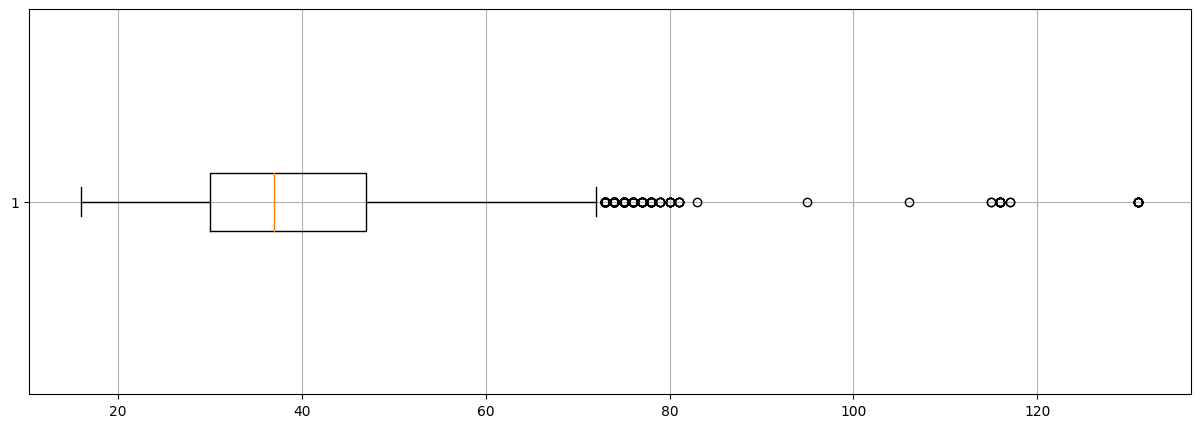

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.boxplot(df["age"], vert=False)
ax.grid()
plt.show()

##### Outlier Removal

Remove the values in the `age` column that are Q3+/-1.5IQR away. And then plot a 2x1 layout in which the top row displays the original values in a histogram and the bottom row displays the filtered values again as a histograms.

The interquartile range (IQR) is a measure of variability, based on dividing a data set into quartiles.

*hint: you may utilize the percentile function of numpy from [this link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html).*


In [ ]:
# your code

### Bivariate Analysis

![](https://www.i2tutorials.com/wp-content/uploads/2019/09/What-do-you-mean-by-Univariate-Bivariate-and-Multivariate-3-i2tutorials.png)



#### Scatter Plot

In scatter plots, overplotting a is common problem. In order to tackle the issue, you may apply different methods.

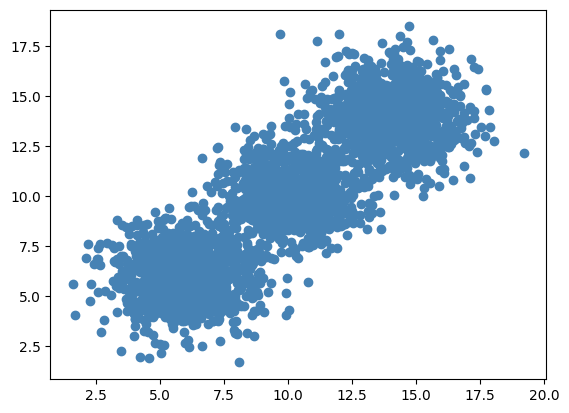

In [ ]:
n = 1000
means = [10, 6, 14]
scales = [1.2, 1.4, 1.5]

data = []
for i in range(3):
  d = {
      "x": np.random.normal(loc=means[i], scale=scales[i], size=n),
      "y": np.random.normal(loc=means[i], scale=scales[i], size=n)
  }
  data.append(d)

for d in data:
  plt.scatter(d["x"], d["y"], c="steelblue")

**Decreasing the dot size**

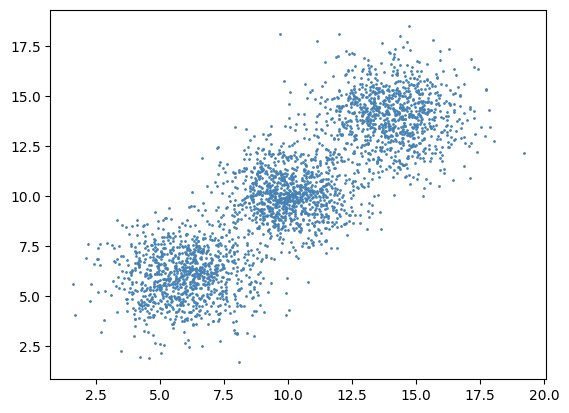

In [ ]:
for d in data:
  plt.scatter(d["x"], d["y"], c="steelblue", s=1)

**Transparency**

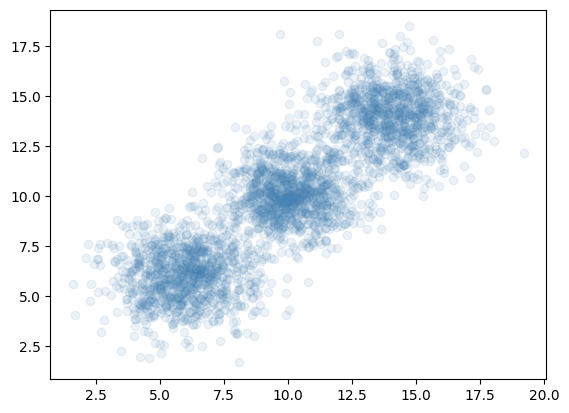

In [ ]:
for d in data:
  plt.scatter(d["x"], d["y"], c="steelblue", alpha=0.1)

**Grouping**

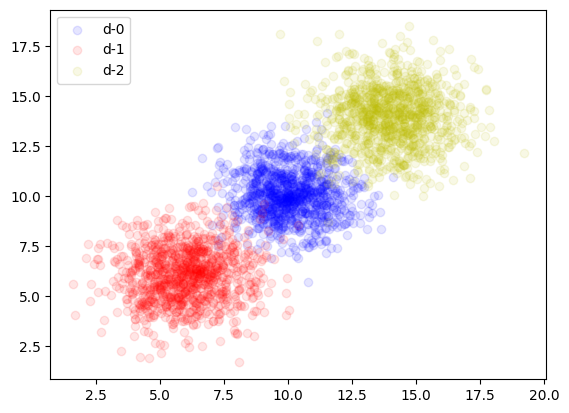

In [ ]:
colors = ["b","r","y"]
for i, d in enumerate(data):
  plt.scatter(d["x"], d["y"], c=colors[i], alpha=0.1, label=f"d-{i}")

plt.legend()
plt.show()

#### Heatmaps

In order to display the correlations among variables in the data, you may also deploy a heatmap.

![](https://miro.medium.com/max/3896/1*ALUzKhbL6_NLVHqhSUQDOg.png)

In [ ]:
# Creating a random dataframe
data = np.random.rand(10, 5)  # 10 rows and 5 columns
columns = ['A', 'B', 'C', 'D', 'E']  # Column names
df = pd.DataFrame(data, columns=columns)
df.head()

,A,B,C,D,E
0,0.149448,0.868126,0.162493,0.615560,0.123820
1,0.848008,0.807319,0.569101,0.407183,0.069167
2,0.697429,0.453543,0.722056,0.866382,0.975522
3,0.855803,0.011714,0.359978,0.729991,0.171630
4,0.521037,0.054338,0.199997,0.018522,0.793698


In order to compute the correlation among the variables in a dataframe, we can directly call the `corr` method which returns another dataframe that stores the correlation coefficients.

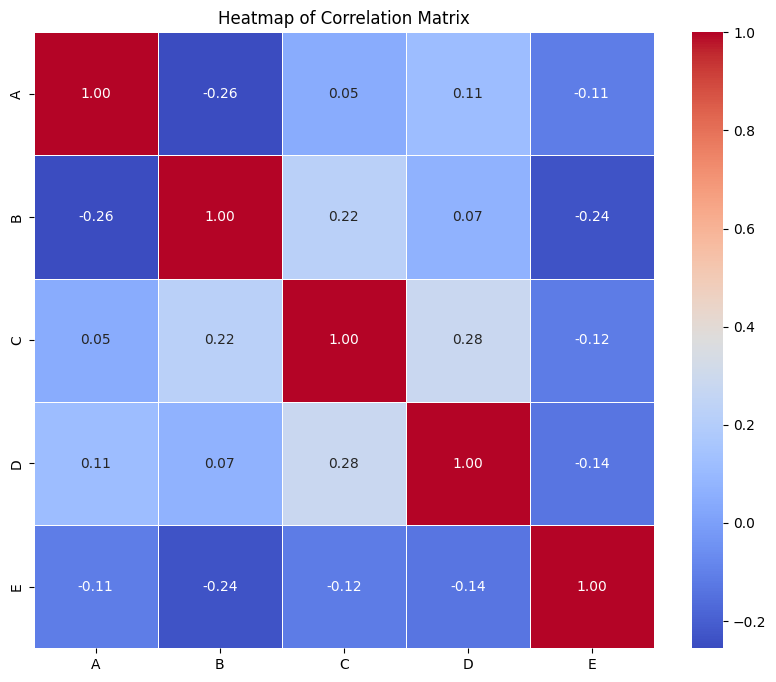

In [ ]:
import seaborn as sns

# Calculating the correlation matrix
corr_matrix = df.corr()

# Creating a heatmap to display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

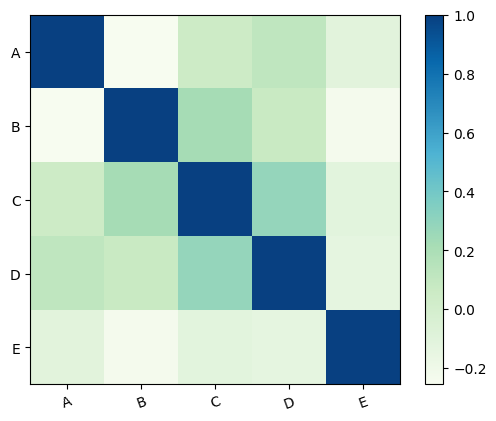

In [ ]:
plt.imshow(corr_matrix, cmap="GnBu")
plt.colorbar()
plt.xticks(range(len(corr_matrix)),corr_matrix.columns, rotation=20)
plt.yticks(range(len(corr_matrix)),corr_matrix.index)
plt.show()

In the figure above, the coloring is applied based on the local correlation values, i.e. we cannot see the color value for coefficient -1. Now, add vmin (set to -1) and vmax (set to 1) parameters to the `imshow` function and observe how the resulting figure differs from the one above.

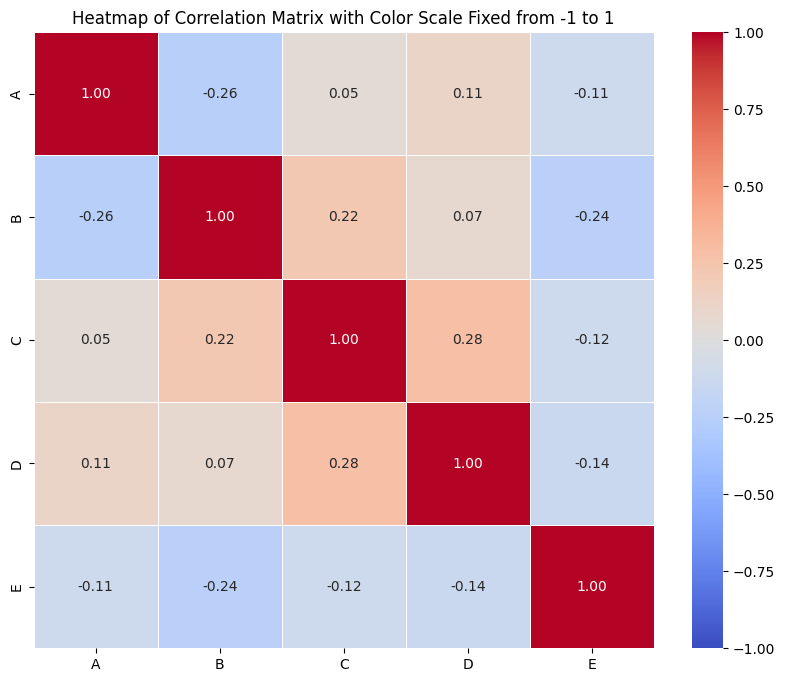

In [ ]:
# your code
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix with Color Scale Fixed from -1 to 1')
plt.show()
